# Pandas 시각화
판다시 자체적으로 matplotlib 를 기반으로 한 시각화기능을 지원한다.    
Series나 DataFrame에 plot() 함수나 plot accessor를 사용한다.
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## plot() 
- kind 매개변수에 지정한 값에 따라 다양한 그래프를 그릴 수 있다.
- kind : 그래프 종류 지정
    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot

matplotlib를 이용해 여러 설정들 가능

## 막대 그래프
- index가 무슨 값인지를 가리키는 축으로 사용된다.

In [2]:
tips = pd.read_csv('data/tips.csv')
tips.shape

(244, 7)

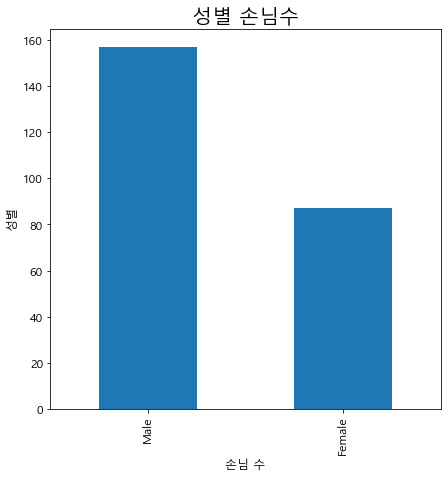

In [9]:
# 성별: 남성, 여성의 수
plt.figure(figsize=(7,7))
tips['sex'].value_counts().plot(kind='bar')
# Series.bar(): index가 x축, value가 y축
plt.title("성별 손님수")
plt.xlabel("손님 수")
plt.ylabel("성별")

plt.show()

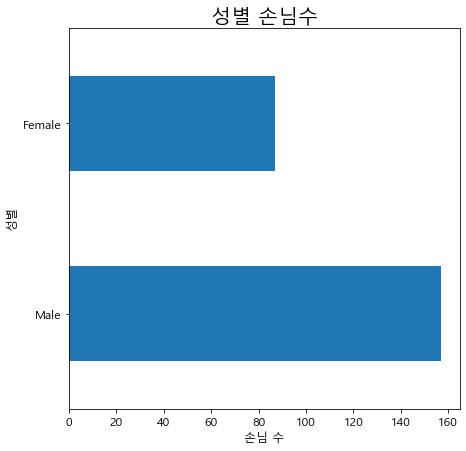

In [10]:
plt.figure(figsize=(7,7))

tips['sex'].value_counts().plot(kind='barh')

# Series.bar(): index가 x축, value가 y축
plt.title("성별 손님수")
plt.xlabel("손님 수")
plt.ylabel("성별")

plt.show()

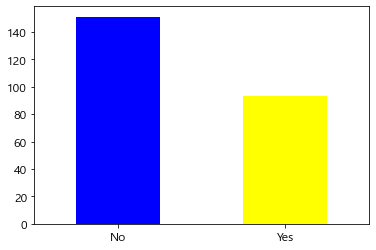

In [15]:
sm = tips['smoker'].value_counts()
sm.plot.bar(color=['blue', 'yellow'], rot=0)
plt.show()

- 두개의 분류 별로 그리기
    - 여러개의 컬럼일 경우 수평 누적 막대그래프를 그린다.


In [16]:
tips.pivot_table(index='smoker', columns='sex', values='tip', aggfunc='count')

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


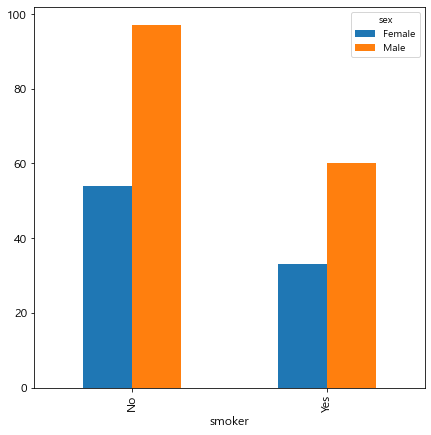

In [17]:
agg_df = tips.pivot_table(index='smoker', columns='sex', values='tip', aggfunc='count')
agg_df.plot.bar(figsize=(7,7))
plt.show()

In [19]:
# 요일(day) - 성별(sex) 손님의 총 수(size)
# DF의 index: ticks - 1차 그룹, columns - 각 ticks마다 나눠져서 나옴 - 2차 그룹
tips.pivot_table(index='day', columns='sex', values='size', aggfunc='sum')

sex,Female,Male
day,,
Fri,19,21
Sat,63,156
Sun,53,163
Thur,79,73


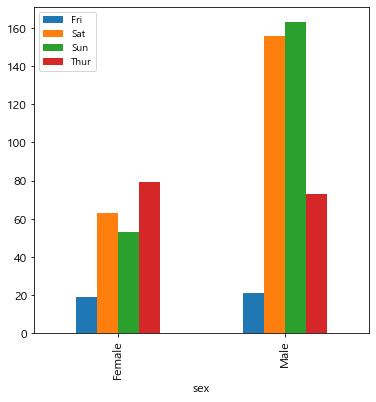

In [23]:
tips.pivot_table(index='sex', columns='day', values='size', aggfunc='sum').plot.bar(figsize=(6,6))
plt.legend(loc='upper left')
plt.show()

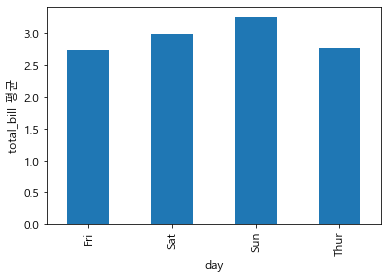

In [26]:
tips.groupby('day')['tip'].mean().plot.bar()
plt.ylabel('total_bill 평균')
plt.show()

## 파이차트

<AxesSubplot:ylabel='day'>

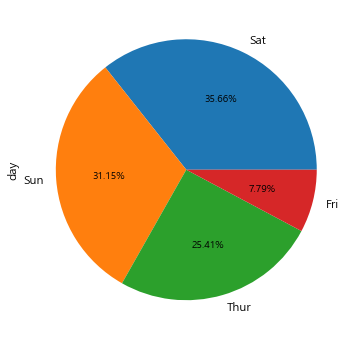

In [30]:
tips['day'].value_counts().plot.pie(figsize=(6,6), autopct='%.2f%%')

<AxesSubplot:ylabel='tip'>

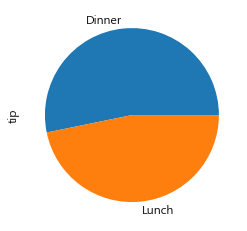

In [34]:
tips.groupby('time')['tip'].mean().plot(kind='pie')

## 히스토그램, KDE(밀도그래프)

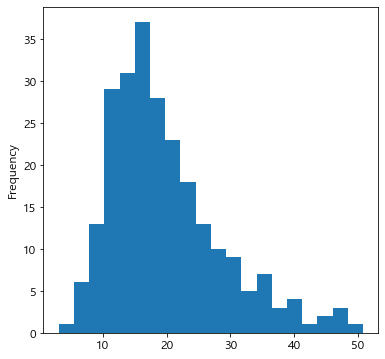

In [37]:
tips['total_bill'].plot.hist(figsize=(6,6), bins=20)

plt.show()

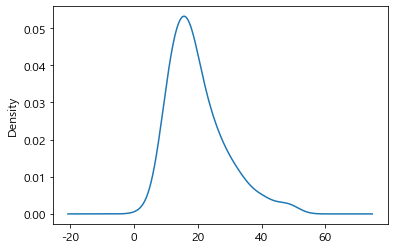

In [38]:
tips['total_bill'].plot.kde()
plt.show()

## Boxplot (상자그래프)

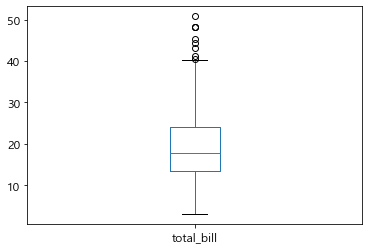

In [39]:
# Series
tips['total_bill'].plot.box()
plt.show()

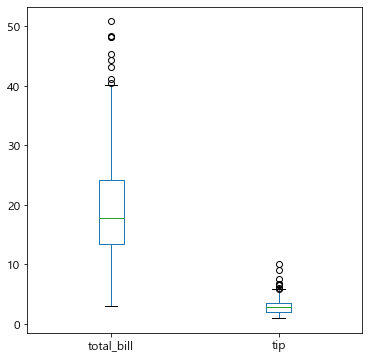

In [41]:
# DF
tips[['total_bill', 'tip']].plot(kind='box', figsize=(6,6))
plt.show()

## scatter plot (산점도) 

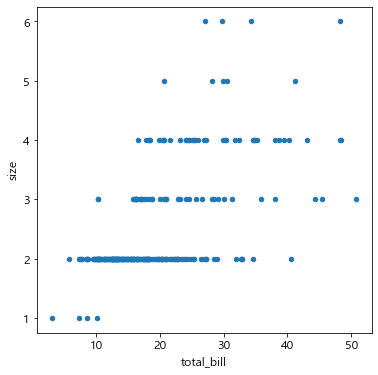

In [44]:
tips.plot(kind='scatter', x='total_bill', y='size', figsize=(6,6))  #x에 올 컬럼명, y에 올 컬럼명
plt.show()

In [43]:
tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


# 파이썬의 날짜/시간 다루기
- datetime 모듈
- datetime 클래스


In [45]:
import datetime  #module

In [46]:
c = datetime.datetime.now()  #현재 일시를 datetime객체로 반환
c

datetime.datetime(2021, 3, 11, 15, 53, 33, 190434)

In [47]:
# 특정 일시
date = datetime.datetime(2000, 4, 5)
date

datetime.datetime(2000, 4, 5, 0, 0)

In [55]:
date2 = datetime.datetime(2010, 5, 20, 15, 32, 5)
date2 = datetime.datetime.now()
date2

datetime.datetime(2021, 3, 11, 16, 19, 7, 431060)

In [56]:
print(date2.year, date2.month, date2.day, date2.hour, date2.minute, date2.second)
print('요일:', date2.weekday())  #0: 월요일, 6: 일요일

2021 3 11 16 19 7
요일: 3


In [57]:
date2.isocalendar()  #(년도, 주차, 요일)  #1: 월, 7: 일

(2021, 10, 4)

In [60]:
# datetime -> 문자열
# datetime.strftime("format문자열")
date2.strftime('%Y/%m/%d %H:%M:%S %A')

'2021/03/11 16:19:07 Thursday'

In [ ]:
# strptime
datetime.datetime.strptime("2020/10/20", )

# 판다스에서 datetime 사용

In [62]:
d = [datetime.datetime.now()]*10
df = pd.DataFrame({
    'age':np.random.randint(10, 100, 10),
    'day':d
})
df.shape

(10, 2)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   age     10 non-null     int32         
 1   day     10 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int32(1)
memory usage: 248.0 bytes


df accessor: datetime 타입의 값들을 처리하는 기능을 제공

In [66]:
# Series 타입: datetime64
df['day'].dt.year

0    2021
1    2021
2    2021
3    2021
4    2021
5    2021
6    2021
7    2021
8    2021
9    2021
Name: day, dtype: int64

In [68]:
df['day'].dt.month

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: day, dtype: int64

In [ ]:
# datetime 타입의 index를 생성
# pd.date_range(시작날짜, freq='변화규칙', periods='개수')  #규칙적으로 증가/감소하는 datetime 값을 가지는 index를 생성

In [71]:
pd.date_range('2000/1/1', freq='M', periods=5)  #2000/1/1부터 1개월씩 증가하는 날짜 5개 생성
pd.date_range('2000/1/1', freq='MS', periods=5)
pd.date_range('2000/1/1', freq='Y', periods=5)
pd.date_range('2000/1/1', freq='YS', periods=5)

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')